In [1]:
import torch
from skimage.io import imread
from StyleTransfer import style_transfer, run_iterations, plot_img
from ModelIntermediates import VGG, ModelIntermediates
from matplotlib import pyplot as plt

%matplotlib inline

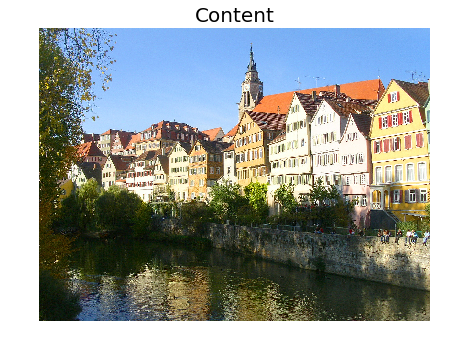

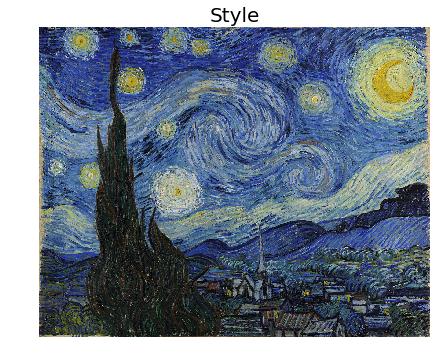

In [2]:
content_image = imread("./imgs/content.png")
plt.figure(figsize=(7,7))
plt.title("Content", fontsize=20)
plt.imshow(content_image)
plt.axis('off')
plt.show()

style_image = imread("./imgs/style.png")
plt.figure(figsize=(7,7))
plt.title("Style", fontsize=20)
plt.imshow(style_image)
plt.axis('off')
plt.show()

In [3]:
cont_names = ['conv4_2']
style_names = ["conv1_1", "conv2_1", "conv3_1", "conv4_1", "conv5_1"]
requested = cont_names + style_names
vgg = VGG().to('cuda' if torch.cuda.is_available() else 'cpu')
model = ModelIntermediates(vgg, requested)

In [4]:
ret = style_transfer(model, content_image, style_image, cont_names, style_names, size=500)
gen_img, content_losses_f, style_losses_f, optimizer = ret

cont_loss 125.185 style_loss 0.606 loss:6182.4473: 100%|██████████| 3000/3000 [06:04<00:00,  8.20it/s]  

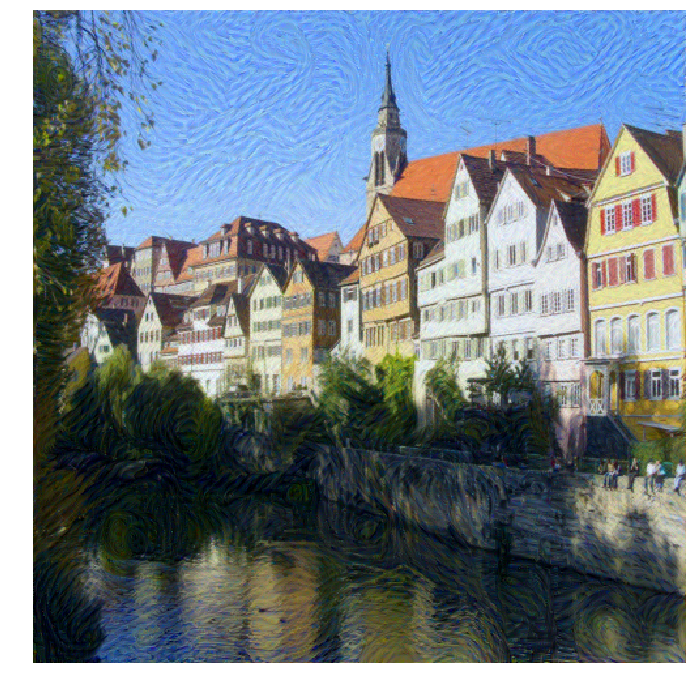

In [5]:
img = run_iterations(model, cont_names, style_names, *ret, iterations=3000)
plt.figure(figsize=(12,12))
plot_img(img)

## Rockets and Nature

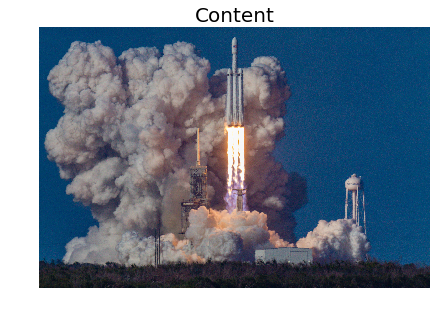

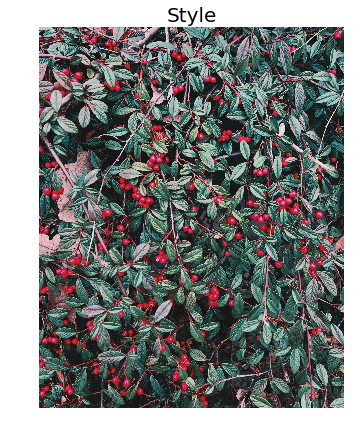

In [6]:
content_image = imread("./imgs/rocket.jpg")
plt.figure(figsize=(7,7))
plt.title("Content", fontsize=20)
plt.imshow(content_image)
plt.axis('off')
plt.show()

style_image = imread("./imgs/leaves.jpg")
plt.figure(figsize=(7,7))
plt.title("Style", fontsize=20)
plt.imshow(style_image)
plt.axis('off')
plt.show()

In [7]:
cont_names = ['conv4_2']
style_names = ["conv1_1", "conv2_1", "conv3_1", "conv4_1", "conv5_1"]
requested = cont_names + style_names
vgg = VGG().to('cuda' if torch.cuda.is_available() else 'cpu')
model = ModelIntermediates(vgg, requested)

In [8]:
ret = style_transfer(model, content_image, style_image, cont_names, style_names, size=500)
gen_img, content_losses_f, style_losses_f, optimizer = ret

cont_loss 188.579 style_loss 33.838 loss:338573.0000: 100%|██████████| 2000/2000 [04:02<00:00,  8.23it/s]   

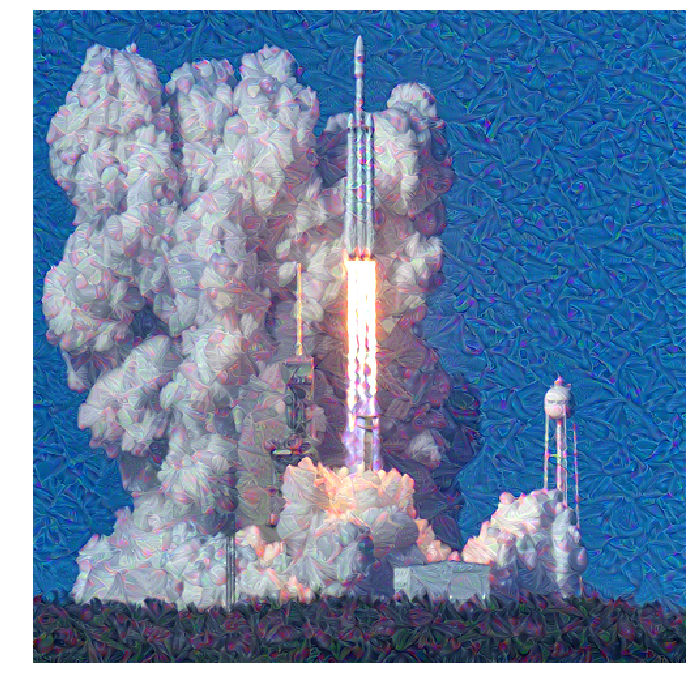

In [9]:
img = run_iterations(model, cont_names, style_names, *ret, iterations=2000)
plt.figure(figsize=(12,12))
plot_img(img)